In [60]:
from testproblems import generate_random_prob, random_problem_with_artifacts
from itertools import product, chain
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [109]:
m,n,rndseed = 20,20,229

We can generate random problems with sparsity fraction $\alpha$ through the following line of code 

In [110]:
alpha = 1.5
biadj,_,_ = generate_random_prob(m, n, rndseed, alpha)

We can generate random problems with mean row-density $\rho$ through the following line of code

In [111]:
rho = 3
biadj,_,_ = generate_random_prob(m, n, rndseed, rho, independent_of_n=True)

Next we compare them

In [200]:
ms = (20,)
ns = (24,30)
rhos = (1,2,3,4)
alphas = (0.5,1,1.5,2)

In [201]:
cases = ((m,n,args[0],args[1]) for m,n,args in product(ms,ns,chain(product(rhos, (True,)),product(alphas, (False,)))))

In [202]:
stats = []
nrndcases = 1000
for m, n, sprmeasr, indepofn in cases:#[1, 2., 3, 4.]:
    for seed in range(nrndcases):
        biadj,_,_ = generate_random_prob(m,n,seed,sprmeasr,independent_of_n=indepofn)
        nonzero_rowcount = [len(val) for val in biadj.values()]
        true_alpha = np.sum(nonzero_rowcount)/(m*n) # from 0 to 1
        true_rho = np.mean(nonzero_rowcount) # from 0 to m
        stats.append((m,n,sprmeasr, indepofn, true_alpha, true_rho))

In [203]:
df = pd.DataFrame(stats, columns=['m', 'n', 'measure', 'msrtype', 'alpha', 'rho'])

In [221]:
n1 = df['n']==ns[0]
n2 = ~n1
# df_indep = df[df['msrtype']]
# df_dep = df[~df['msrtype']]
df_indep_n1 = df[df['msrtype'] & n1]
df_dep_n1 = df[~df['msrtype'] & n1]
df_indep_n2 = df[df['msrtype'] & n2]
df_dep_n2 = df[~df['msrtype'] & n2]

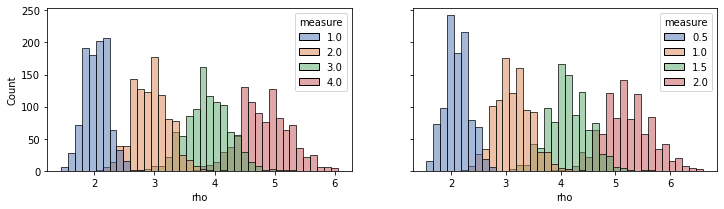

In [220]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12,3))
sns.histplot(data=df_indep_n1, x='rho', hue='measure', palette='deep', bins=40, ax=ax1);
sns.histplot(data=df_dep_n1, x='rho', hue='measure', palette='deep', bins=40, ax=ax2);

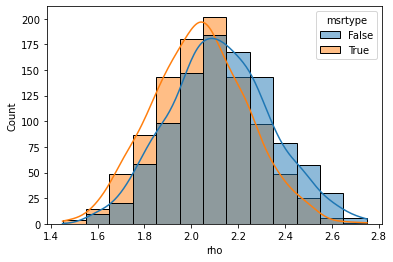

In [237]:
sns.histplot(data=df.query("n==24 & ((measure==1 & msrtype)| (measure==.5 & not(msrtype)))"), x='rho', hue='msrtype', bins=13, kde=True);

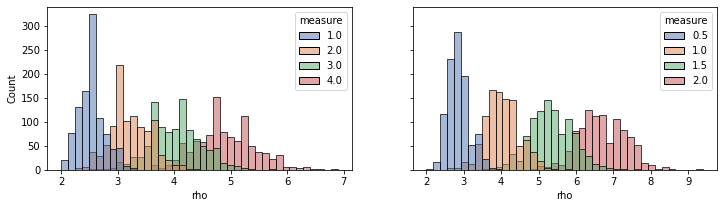

In [188]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12,3))
sns.histplot(data=df_indep_n2, x='rho', hue='measure', palette='deep', bins=40, ax=ax1);
sns.histplot(data=df_dep_n2, x='rho', hue='measure', palette='deep', bins=40, ax=ax2);